In [84]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import numpy as np
from numpy import array
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
 
 
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import time
 
from sklearn.pipeline import Pipeline
from sklearn.metrics import  mean_squared_error, mean_absolute_error , r2_score
from sklearn.metrics import  accuracy_score, precision_score , recall_score , f1_score , roc_auc_score , confusion_matrix, roc_curve
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef

import xgboost as xgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import StratifiedKFold

## Feature Selection

In [85]:
# Load the data
path="c:/Users/Hooshmand/Desktop/Dataset_Payanname/nosql/Final/synthetic_data_2000_binary_label-from400datatrain80.csv"
df= pd.read_csv(path, sep=',')

path_test="c:/Users/Hooshmand/Desktop/Dataset_Payanname/nosql/Final/synthetic_data_2000_binary_label-from400datatest20.csv"
df_test= pd.read_csv(path_test, sep=',')


In [96]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# تابع بررسی مقادیر missing
def check_missing(df):
    missing_info = []
    for col in df.columns:
        n_miss = df[col].isnull().sum()
        if n_miss > 0:
            missing_info.append(
                f"{col} column missing values: {n_miss}, datatype: {df[col].dtype}"
            )
    return missing_info

# شناسایی ستون‌های عددی و دسته‌بندی
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# نمایش مقادیر missing قبل از اعمال ایمپیوتر
missing_before = check_missing(df)
print("Missing values before imputation:")
if missing_before:
    for info in missing_before:
        print(info)
else:
    print("No missing values.")

# ایجاد SimpleImputer برای ستون‌های عددی و دسته‌بندی
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

# اعمال ایمپیوتر بر روی ستون‌های عددی (اگر وجود دارد)
if numerical_cols:
    df.loc[:, numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
else:
    print("No numerical columns found.")

# بررسی ستون‌های دسته‌بندی معتبر (حداقل یک مقدار غیر NaN داشته باشند)
valid_categorical_cols = [col for col in categorical_cols if df[col].notna().any()]

# اعمال ایمپیوتر بر روی ستون‌های دسته‌بندی معتبر
if valid_categorical_cols:
    imputed_cat = cat_imputer.fit_transform(df[valid_categorical_cols])

    # ✅ با حفظ index و columns برگردان به df (خیلی مهم)
    imputed_cat_df = pd.DataFrame(imputed_cat, columns=valid_categorical_cols, index=df.index)

    # بهتره نوع داده‌ها را دوباره object نگه داریم
    for col in valid_categorical_cols:
        imputed_cat_df[col] = imputed_cat_df[col].astype(str)

    df.loc[:, valid_categorical_cols] = imputed_cat_df
else:
    print("No valid categorical columns for imputation")

# بررسی مقادیر missing بعد از اعمال ایمپیوتر
missing_after = check_missing(df)
print("Missing values after imputation:")
if missing_after:
    for info in missing_after:
        print(info)
else:
    print("No missing values.")


Missing values before imputation:
No missing values.
No valid categorical columns for imputation
Missing values after imputation:
No missing values.


In [97]:
print("df shape:", df.shape)
print("df_test shape:", df_test.shape)

print("\nDtypes in df:")
print(df.dtypes.value_counts())

print("\nAny NA in df?", df.isna().any().any())
print("Total NA in df:", df.isna().sum().sum())

print("\nObject columns (df):", df.select_dtypes(include=["object"]).columns.tolist())

print("\nSample head:")
display(df.head())


df shape: (1600, 19)
df_test shape: (400, 19)

Dtypes in df:
float64    18
int64       1
Name: count, dtype: int64

Any NA in df? False
Total NA in df: 0

Object columns (df): []

Sample head:


,num_keys,num_operators,length_user_value,length_password_value,length_username_value,contains_email_pattern,contains_ip_pattern,nested_keys_exist,num_nested_keys,contains_numeric_values,contains_boolean_values,contains_empty_strings,contains_fixed_values,unique_key_count,data_type_diversity,total_record_length,special_characters_exist,nested_depth,label
0,2.018379,0.004167,68.046230,11.016473,-0.030924,0.000048,0.000112,1.000366,1.001474,0.001716,-0.000247,0.000071,0.000471,1.993371,2.002698,104.507012,0.997005,1.009948,1
1,-0.003375,0.002472,-0.199158,-0.107818,-0.057641,-0.000165,-0.000035,0.004718,-0.006709,-0.003420,0.000113,0.000062,-0.001094,0.010051,-0.002538,95.008048,0.000144,-0.008865,1
2,0.993905,-0.002689,-0.046140,0.017756,0.073245,0.000101,-0.000014,0.999217,0.995950,-0.001541,-0.000014,0.000061,-0.000266,1.003364,0.990094,22.965183,0.996113,1.008348,1
3,-0.004081,0.001644,-0.152106,-0.068945,0.023854,0.000018,-0.000003,0.005010,0.010574,0.000486,-0.000049,0.000073,-0.000561,0.013482,-0.006141,19.111268,-0.003720,0.003741,0
4,2.000599,0.999773,-0.071891,0.003398,38.130820,-0.000047,0.000129,1.002294,1.000481,1.002537,0.000058,-0.000119,-0.001742,2.006209,2.018131,68.848456,0.997247,1.003230,0


In [98]:
print("Same columns and order? ", list(df.columns) == list(df_test.columns))
print("Diff train-test (train - test):", set(df.columns) - set(df_test.columns))
print("Diff train-test (test - train):", set(df_test.columns) - set(df.columns))


Same columns and order?  True
Diff train-test (train - test): set()
Diff train-test (test - train): set()


In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

TARGET = "label"

def binarize_label(s: pd.Series) -> pd.Series:
    s_num = pd.to_numeric(s, errors="coerce").fillna(0)
    return (s_num > 0).astype(int)

# ---- Train ----
y_train = binarize_label(df[TARGET].copy())
X_train = df.drop(columns=[TARGET]).copy()

print("Train label distribution:")
print(y_train.value_counts(dropna=False))

categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

label_encoders = {}
if categorical_cols:
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        label_encoders[col] = le
else:
    print("No categorical columns to encode.")

# ---- Test ----
y_test = binarize_label(df_test[TARGET].copy())
X_test = df_test.drop(columns=[TARGET]).copy()

print("\nTest label distribution:")
print(y_test.value_counts(dropna=False))

# transform categorical using train encoders (no fit)
for col in categorical_cols:
    le = label_encoders[col]
    xcol = X_test[col].astype(str)

    known = set(le.classes_)
    unseen_mask = ~xcol.isin(known)
    if unseen_mask.any():
        # fallback to first class (or better: most frequent class in train)
        xcol.loc[unseen_mask] = le.classes_[0]

    X_test[col] = le.transform(xcol)


Train label distribution:
label
1    1245
0     355
Name: count, dtype: int64
No categorical columns to encode.

Test label distribution:
label
1    311
0     89
Name: count, dtype: int64


In [101]:
print(df['label'].value_counts(dropna=False))

label
1    1245
0     355
Name: count, dtype: int64


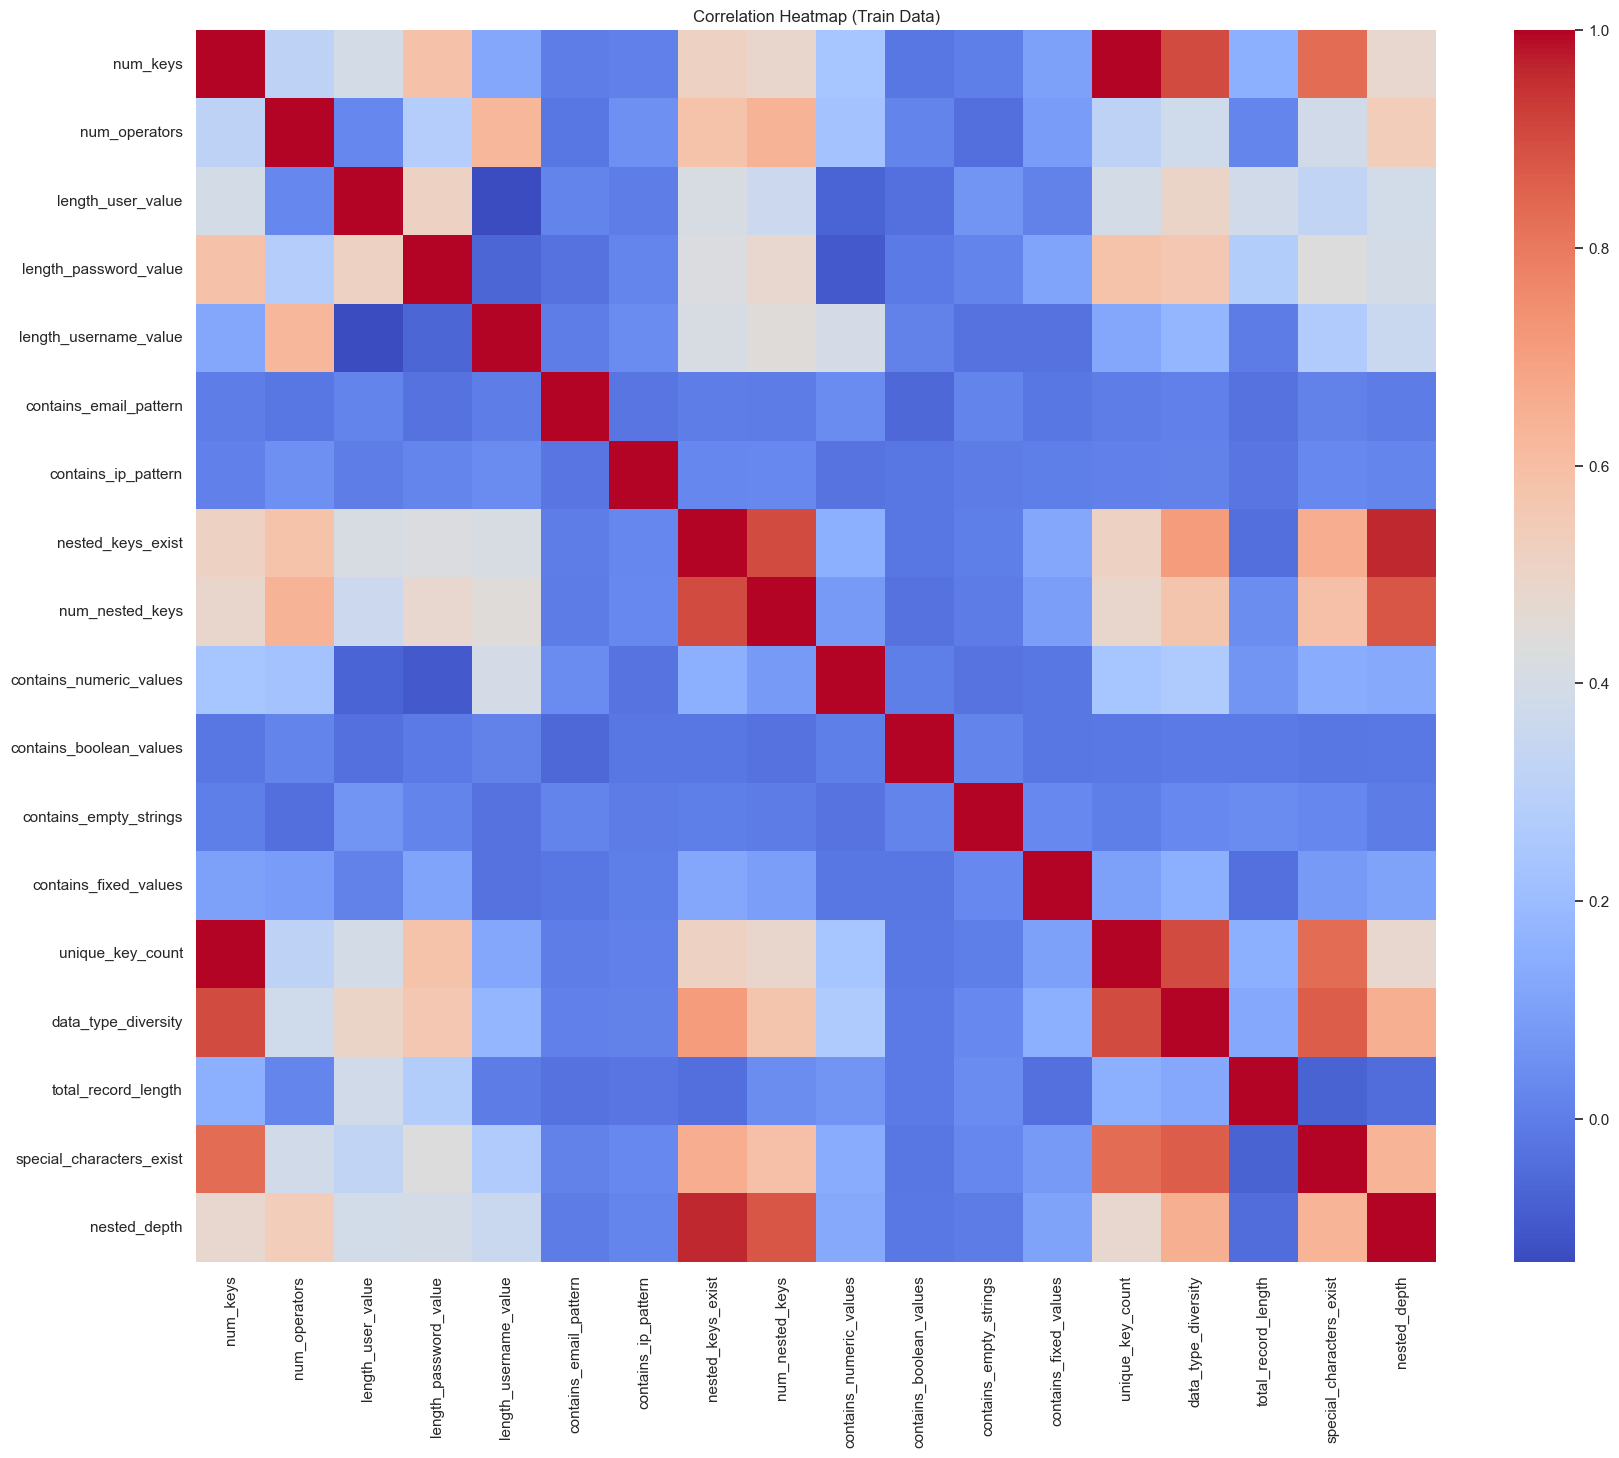

Number of features to drop (|corr|>0.9): 3
Dropped features: ['data_type_diversity', 'nested_depth', 'unique_key_count'] ...
Train Original shape: (1600, 18)
Train Reduced shape : (1600, 15)
Test  Original shape: (400, 18)
Test  Reduced shape : (400, 15)


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1) Correlation on TRAIN only
# =========================
X_numeric_train = X_train.select_dtypes(include=[np.number])

correlation_matrix = X_numeric_train.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (Train Data)')
plt.show()

# =========================
# 2) Find highly correlated features
# =========================
threshold = 0.9
col_corr = set()

cols = correlation_matrix.columns
for i in range(len(cols)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = cols[i]   # ستون دوم را حذف می‌کنیم (تصمیم ثابت)
            col_corr.add(colname)

print(f"Number of features to drop (|corr|>{threshold}):", len(col_corr))
print("Dropped features:", sorted(list(col_corr))[:20], "...")  # نمایش نمونه

# =========================
# 3) Reduce TRAIN and apply SAME reduction to TEST
# =========================
X_train_reduced = X_train.drop(columns=list(col_corr), errors="ignore")
X_test_reduced  = X_test.drop(columns=list(col_corr), errors="ignore")

print("Train Original shape:", X_train.shape)
print("Train Reduced shape :", X_train_reduced.shape)
print("Test  Original shape:", X_test.shape)
print("Test  Reduced shape :", X_test_reduced.shape)

# =========================
# 4) Final selected features (for reproducibility)
# =========================
selected_features = X_train_reduced.columns.tolist()

# جایگزینی نهایی
X_train = X_train_reduced
X_test  = X_test_reduced


In [103]:
# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# بررسی توزیع مقادیر y در مجموعه‌های آموزشی و آزمایشی
print("Distribution in y_train:", np.bincount(y_train))
print("Distribution in y_test:", np.bincount(y_test))

# استفاده از SMOTE برای تعادل داده‌ها در مجموعه آموزشی
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# استانداردسازی داده‌ها با استفاده از StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Distribution in y_train: [551 729]
Distribution in y_test: [148 172]
X_train shape: (1458, 18)
X_test shape: (320, 18)
y_train shape: (1458,)
y_test shape: (320,)


## Model 

In [104]:
# ایجاد دیتافریم برای مقایسه عملکرد مدل‌ها
model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'roc-Auc'])



جدول 1) خلاصه نتایج Cross-Validation روی داده‌های TRAIN (Stratified K-Fold)
این جدول میانگین و انحراف معیار معیارها را روی فولدهای آموزشی گزارش می‌کند.


,Model,Accuracy_Mean,Accuracy_Std,AUC_Mean,AUC_Std,Recall_Mean,Precision_Mean,F1_Mean,Kappa_Mean,MCC_Mean
6,Light GBM,0.875182,0.021060,0.943062,0.017184,0.875152,0.877723,0.874941,0.750347,0.752862
9,Stacking Ensemble,0.868347,0.025840,0.938029,0.017464,0.868341,0.872566,0.867949,0.736686,0.740891
11,XGBoost,0.860090,0.028220,0.933076,0.017914,0.860093,0.861271,0.859946,0.720177,0.721362
2,Ensemble Model,0.856693,0.028787,0.925759,0.016737,0.856669,0.859037,0.856429,0.713372,0.715696
4,Gradient Boosting,0.829915,0.030429,0.903281,0.029384,0.829890,0.833153,0.829459,0.659802,0.663024
8,Random Forest,0.816892,0.031406,0.900179,0.023501,0.816885,0.819914,0.816428,0.633777,0.636776
3,Extra Trees,0.781904,0.033293,0.878177,0.027216,0.781859,0.783799,0.781529,0.563764,0.565649
1,Decision Tree,0.764053,0.028624,0.852747,0.017916,0.763994,0.767826,0.763159,0.528043,0.531775
5,K-Nearest Neighbors,0.733916,0.026037,0.812015,0.030070,0.733847,0.739603,0.732180,0.467762,0.473403
0,AdaBoost,0.716075,0.031258,0.803405,0.036306,0.715982,0.723131,0.713866,0.432048,0.438998



جدول 2) نتایج نهایی روی TEST (Train روی کل TRAIN، ارزیابی روی TEST)
این جدول عملکرد واقعی مدل‌ها روی داده‌های تست را نشان می‌دهد.


,Model,Accuracy,Recall,Precision,F1,Kappa,MCC,AUC,Training_Time,Prediction_Time
6,Light GBM,0.846875,0.842473,0.850529,0.844566,0.689824,0.692955,0.925519,0.229595,0.004000
11,Stacking Ensemble,0.837500,0.830924,0.846610,0.833760,0.669421,0.677352,0.905739,4.776836,0.169996
10,Ensemble Model,0.825000,0.823067,0.824495,0.823650,0.647355,0.647561,0.905641,3.080858,0.203484
5,XGBoost,0.840625,0.836659,0.843143,0.838465,0.677470,0.679772,0.904188,0.256179,0.004693
2,Gradient Boosting,0.775000,0.770899,0.775575,0.772116,0.544880,0.546454,0.858383,0.584466,0.003002
4,Random Forest,0.796875,0.794547,0.796235,0.795193,0.590487,0.590780,0.852923,1.206397,0.145330
1,Decision Tree,0.709375,0.713152,0.712960,0.709372,0.421732,0.426112,0.832692,0.034215,0.001004
7,Extra Trees,0.740625,0.737508,0.739550,0.738168,0.476588,0.477053,0.832220,0.827280,0.140747
3,K-Nearest Neighbors,0.753125,0.753850,0.752511,0.752581,0.505555,0.506359,0.794547,0.001001,0.035986
9,AdaBoost,0.684375,0.687539,0.687076,0.684347,0.371402,0.374615,0.789814,0.828149,0.026016



شکل 1) Confusion Matrix تمام مدل‌ها روی TEST (همه در یک تصویر)
هر پنل مربوط به یک مدل است و ماتریس درهم‌ریختگی همان مدل را روی داده‌های تست نشان می‌دهد.


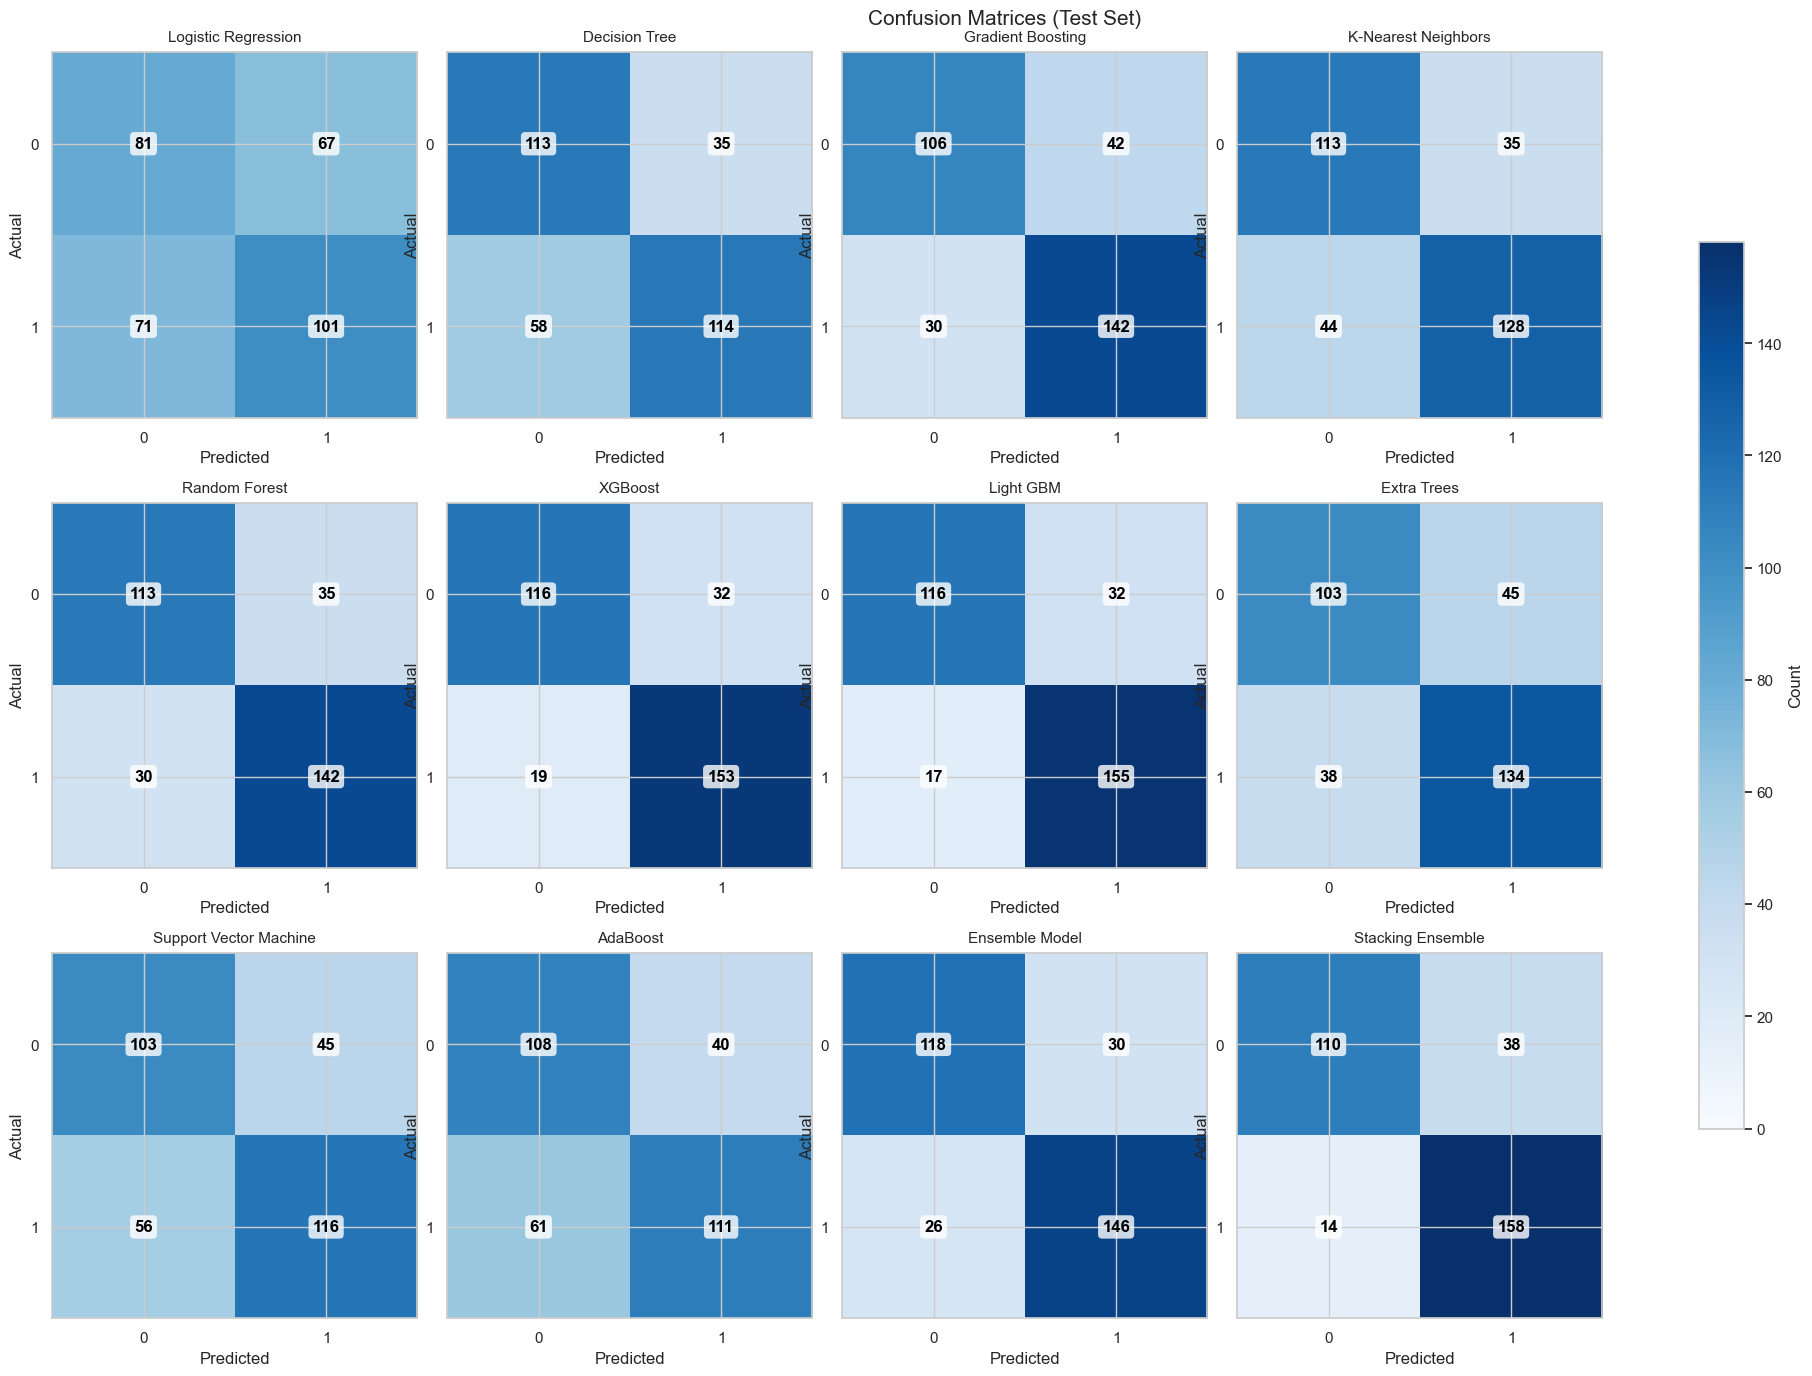


جدول 3) تحلیل زمان اجرا (چند بار اجرا برای میانگین/انحراف معیار)
این جدول میانگین/انحراف معیار زمان آموزش و پیش‌بینی را روی چند اجرای تکراری گزارش می‌کند.


,Model,Avg_Training_Time,Std_Training_Time,Avg_Prediction_Time,Std_Prediction_Time
0,Logistic Regression,0.004917,0.000871,0.000200,0.000400
1,Decision Tree,0.025524,0.000834,0.000206,0.000411
2,Gradient Boosting,0.445892,0.023369,0.001201,0.000399
5,XGBoost,0.319353,0.022521,0.002077,0.000520
6,Light GBM,0.231219,0.010105,0.003001,0.000001
3,K-Nearest Neighbors,0.001001,0.000002,0.014033,0.000637
9,AdaBoost,0.808569,0.075363,0.015036,0.001419
8,Support Vector Machine,0.307911,0.022791,0.019558,0.001935
7,Extra Trees,0.700198,0.078639,0.071227,0.006684
11,Stacking Ensemble,4.845776,0.236346,0.073556,0.011899



فایل‌های خروجی ذخیره شدند:
- cross_validation_results.csv (خلاصه CV)
- test_set_results.csv (نتایج نهایی TEST)
- timing_results.csv (زمان اجرا)
Saved to: c:\Users\Hooshmand\Desktop\Dataset_Payanname\nosql\Final\results


In [107]:
# -----------------------------
# 0) Silence warnings + clean logging
# -----------------------------
import warnings
warnings.filterwarnings("ignore")  # نمایش ندادن همه warning ها

# اگر LightGBM / XGBoost پیام‌های اضافی چاپ می‌کنند، همین تنظیمات زیر کمک می‌کند:
import os
os.environ["PYTHONWARNINGS"] = "ignore"

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, precision_score, f1_score,
    cohen_kappa_score, matthews_corrcoef, confusion_matrix
)

# اگر در Jupyter هستید display موجود است؛ اگر نبود، fallback به print
try:
    from IPython.display import display
except Exception:
    def display(x):
        print(x)


# -----------------------------
# Utils
# -----------------------------
def _safe_predict_scores(model, X):
    """
    Continuous scores for AUC:
      1) predict_proba[:, 1]
      2) decision_function
      3) None  -> AUC=NaN
    """
    if hasattr(model, "predict_proba"):
        try:
            proba = model.predict_proba(X)
            if proba.ndim == 2 and proba.shape[1] >= 2:
                return proba[:, 1]
        except Exception:
            pass

    if hasattr(model, "decision_function"):
        try:
            return model.decision_function(X)
        except Exception:
            pass

    return None


def compute_metrics(y_true, y_pred, y_score=None):
    out = {
        "Accuracy":  accuracy_score(y_true, y_pred),
        "Recall":    recall_score(y_true, y_pred, average="macro"),
        "Precision": precision_score(y_true, y_pred, average="macro"),
        "F1":        f1_score(y_true, y_pred, average="macro"),
        "Kappa":     cohen_kappa_score(y_true, y_pred),
        "MCC":       matthews_corrcoef(y_true, y_pred),
    }

    if y_score is None:
        out["AUC"] = np.nan
    else:
        try:
            out["AUC"] = roc_auc_score(y_true, y_score)
        except Exception:
            out["AUC"] = np.nan

    return out

import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrices_grid(
    conf_mats,
    model_names,
    n_cols=4,
    figsize=(20, 14),
    normalize=False,
    cmap="Blues"   # روشن‌تر و خواناتر   Blues   Greys
):
    n = len(conf_mats)
    if n == 0:
        print("No confusion matrices to plot.")
        return

    n_cols = min(n_cols, n)
    n_rows = int(np.ceil(n / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, squeeze=False)
    axes = axes.ravel()

    # برای اینکه شدت رنگ‌ها تیره نشه، محدوده رنگ را کنترل می‌کنیم
    global_max = max(cm.max() for cm in conf_mats) if not normalize else 1.0

    for i in range(n_rows * n_cols):
        ax = axes[i]
        if i >= n:
            ax.axis("off")
            continue

        cm = conf_mats[i].astype(float)

        if normalize:
            row_sums = cm.sum(axis=1, keepdims=True)
            cm = np.divide(cm, row_sums, out=np.zeros_like(cm), where=row_sums != 0)

        im = ax.imshow(
            cm,
            interpolation="nearest",
            cmap=cmap,
            vmin=0,
            vmax=global_max
        )

        ax.set_title(model_names[i], fontsize=11, pad=8)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_xticks(range(cm.shape[1]))
        ax.set_yticks(range(cm.shape[0]))

        # عددها با پس‌زمینه سفید نیمه‌شفاف برای خوانایی روی هر رنگی
        for r in range(cm.shape[0]):
            for c in range(cm.shape[1]):
                val = cm[r, c]
                txt = f"{val:.2f}" if normalize else f"{int(val)}"
                ax.text(
                    c, r, txt,
                    ha="center", va="center",
                    fontsize=12, fontweight="bold",
                    color="black",
                    bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="none", alpha=0.8)
                )

    fig.suptitle("Confusion Matrices (Test Set)", fontsize=15)
    fig.tight_layout()

    # یک colorbar کلی (اختیاری ولی مفید)
    cbar = fig.colorbar(im, ax=axes.tolist(), shrink=0.7)
    cbar.set_label("Count" if not normalize else "Rate")

    plt.show()

# -----------------------------
# CV Evaluation
# -----------------------------
from sklearn.model_selection import StratifiedKFold
import pandas as pd

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

def evaluate_models_cv(models, X_train, y_train, n_splits=10, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    def _slice_X(X, idx):
        return X.iloc[idx] if hasattr(X, "iloc") else X[idx]

    def _slice_y(y, idx):
        return y.iloc[idx] if hasattr(y, "iloc") else y[idx]

    rows = []
    for model_name, model in models.items():
        fold_idx = 0
        for tr_idx, va_idx in skf.split(X_train, y_train):
            X_tr = _slice_X(X_train, tr_idx)
            X_va = _slice_X(X_train, va_idx)
            y_tr = _slice_y(y_train, tr_idx)
            y_va = _slice_y(y_train, va_idx)

            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_va)
            y_score = _safe_predict_scores(model, X_va)

            m = compute_metrics(y_va, y_pred, y_score=y_score)
            rows.append({"Model": model_name, "Fold": fold_idx, **m})
            fold_idx += 1

    cv_df = pd.DataFrame(rows)

    cv_summary = (
        cv_df.groupby("Model", as_index=False)
             .agg(
                 Accuracy_Mean=("Accuracy", "mean"),
                 Accuracy_Std=("Accuracy", "std"),
                 AUC_Mean=("AUC", "mean"),
                 AUC_Std=("AUC", "std"),
                 Recall_Mean=("Recall", "mean"),
                 Precision_Mean=("Precision", "mean"),
                 F1_Mean=("F1", "mean"),
                 Kappa_Mean=("Kappa", "mean"),
                 MCC_Mean=("MCC", "mean"),
             )
    )
    return cv_df, cv_summary



# -----------------------------
# Test Evaluation
# -----------------------------
def evaluate_models_test(models, X_train, y_train, X_test, y_test):
    test_rows = []
    conf_mats = []
    model_names = []

    for model_name, model in models.items():
        t0 = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - t0

        t0 = time.time()
        y_pred = model.predict(X_test)
        y_score = _safe_predict_scores(model, X_test)
        pred_time = time.time() - t0

        m = compute_metrics(y_test, y_pred, y_score=y_score)
        cm = confusion_matrix(y_test, y_pred)

        test_rows.append({
            "Model": model_name,
            **m,
            "Training_Time": train_time,
            "Prediction_Time": pred_time
        })

        conf_mats.append(cm)
        model_names.append(model_name)

    return pd.DataFrame(test_rows), conf_mats, model_names


# -----------------------------
# Timing (multi-run)
# -----------------------------
def evaluate_models_timing(models, X_train, y_train, X_test, n_runs=5):
    rows = []
    for model_name, model in models.items():
        train_times, pred_times = [], []

        for _ in range(n_runs):
            t0 = time.time()
            model.fit(X_train, y_train)
            train_times.append(time.time() - t0)

            t0 = time.time()
            _ = model.predict(X_test)
            pred_times.append(time.time() - t0)

        rows.append({
            "Model": model_name,
            "Avg_Training_Time": float(np.mean(train_times)),
            "Std_Training_Time": float(np.std(train_times)),
            "Avg_Prediction_Time": float(np.mean(pred_times)),
            "Std_Prediction_Time": float(np.std(pred_times)),
        })

    return pd.DataFrame(rows)


# -----------------------------
# MAIN
# -----------------------------
# 1) Cross-validation
print("\n" + "="*80)
print("جدول 1) خلاصه نتایج Cross-Validation روی داده‌های TRAIN (Stratified K-Fold)")
print("این جدول میانگین و انحراف معیار معیارها را روی فولدهای آموزشی گزارش می‌کند.")
print("="*80)

cv_df, cv_summary = evaluate_models_cv(models, X_train, y_train, n_splits=10, random_state=42)
cv_summary_sorted = cv_summary.sort_values(["AUC_Mean", "F1_Mean", "Accuracy_Mean"], ascending=False)
display(cv_summary_sorted)

# 2) Test evaluation
print("\n" + "="*80)
print("جدول 2) نتایج نهایی روی TEST (Train روی کل TRAIN، ارزیابی روی TEST)")
print("این جدول عملکرد واقعی مدل‌ها روی داده‌های تست را نشان می‌دهد.")
print("="*80)

test_df, conf_mats, model_names = evaluate_models_test(models, X_train, y_train, X_test, y_test)
test_df_sorted = test_df.sort_values(["AUC", "F1", "Accuracy"], ascending=False)
display(test_df_sorted)

# 3) Confusion matrices in one figure
print("\n" + "="*80)
print("شکل 1) Confusion Matrix تمام مدل‌ها روی TEST (همه در یک تصویر)")
print("هر پنل مربوط به یک مدل است و ماتریس درهم‌ریختگی همان مدل را روی داده‌های تست نشان می‌دهد.")
print("="*80)

plot_confusion_matrices_grid(
    conf_mats=conf_mats,
    model_names=model_names,
    n_cols=4,
    figsize=(20, 14),
    normalize=False  # اگر درصدی می‌خواهید True کنید
)

# 4) Timing analysis
print("\n" + "="*80)
print("جدول 3) تحلیل زمان اجرا (چند بار اجرا برای میانگین/انحراف معیار)")
print("این جدول میانگین/انحراف معیار زمان آموزش و پیش‌بینی را روی چند اجرای تکراری گزارش می‌کند.")
print("="*80)

timing_df = evaluate_models_timing(models, X_train, y_train, X_test, n_runs=5)
timing_df_sorted = timing_df.sort_values("Avg_Prediction_Time", ascending=True)
display(timing_df_sorted)

# 5) Save CSVs
cv_summary_sorted.to_csv("cross_validation_results.csv", index=False)
test_df_sorted.to_csv("test_set_results.csv", index=False)
timing_df_sorted.to_csv("timing_results.csv", index=False)

print("\n" + "="*80)
print("فایل‌های خروجی ذخیره شدند:")
print("- cross_validation_results.csv (خلاصه CV)")
print("- test_set_results.csv (نتایج نهایی TEST)")
print("- timing_results.csv (زمان اجرا)")
print("="*80)


import os

OUT_DIR = r"c:\Users\Hooshmand\Desktop\Dataset_Payanname\nosql\Final\results"
os.makedirs(OUT_DIR, exist_ok=True)

cv_summary_sorted.to_csv(os.path.join(OUT_DIR, "cross_validation_results.csv"), index=False)
test_df_sorted.to_csv(os.path.join(OUT_DIR, "test_set_results.csv"), index=False)
timing_df_sorted.to_csv(os.path.join(OUT_DIR, "timing_results.csv"), index=False)

print("Saved to:", OUT_DIR)


In [106]:
print("X_train type:", type(X_train), "shape:", getattr(X_train, "shape", None))
print("y_train type:", type(y_train), "shape:", getattr(y_train, "shape", None))


X_train type: <class 'numpy.ndarray'> shape: (1458, 18)
y_train type: <class 'pandas.core.series.Series'> shape: (1458,)



بخش 1) Cross-Validation: مقایسه میانگین متریک‌ها (روی TRAIN با K-Fold)
این نمودار میانگین متریک‌های CV را برای هر مدل نشان می‌دهد (از cv_summary).


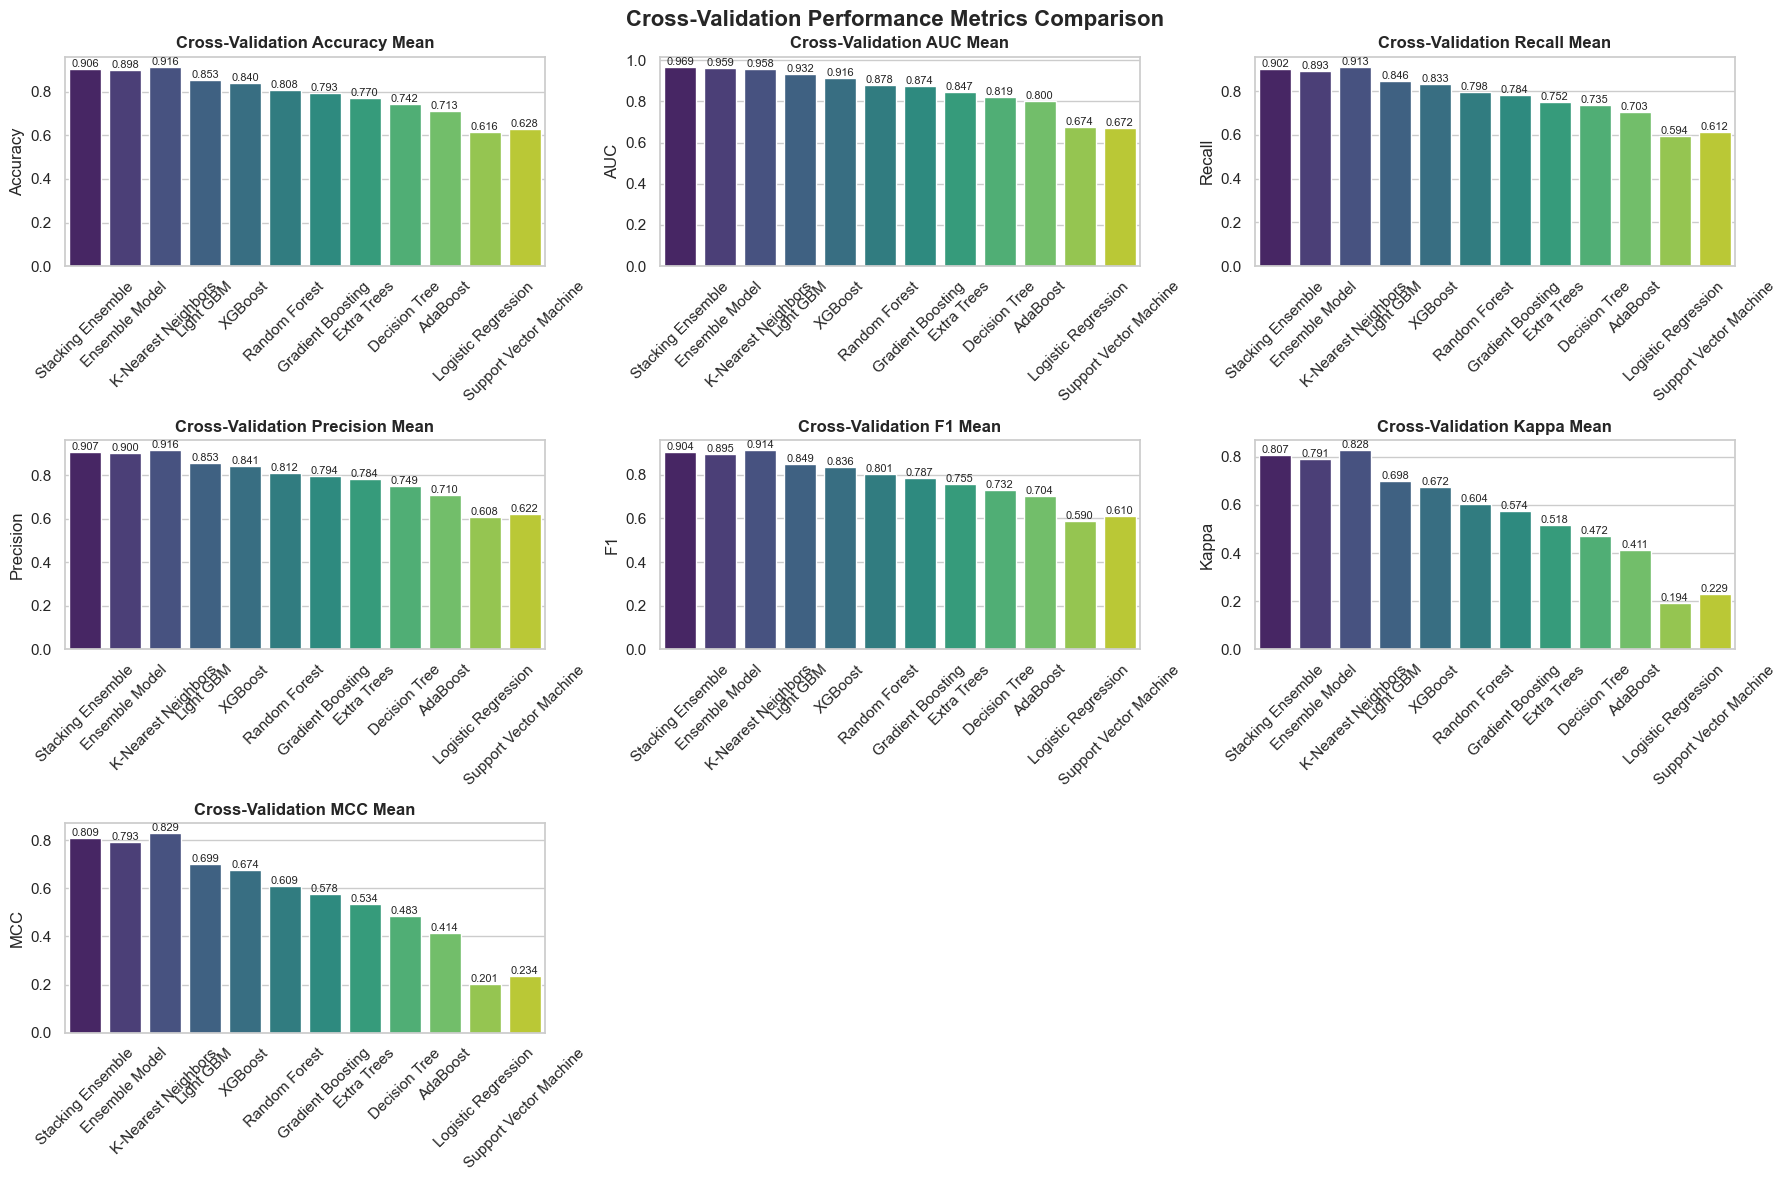


بخش 1-ب) Cross-Validation: توزیع متریک‌ها بین فولدها
این نمودار پراکندگی/توزیع متریک‌ها را در فولدهای مختلف نشان می‌دهد (از all_cv_performances).


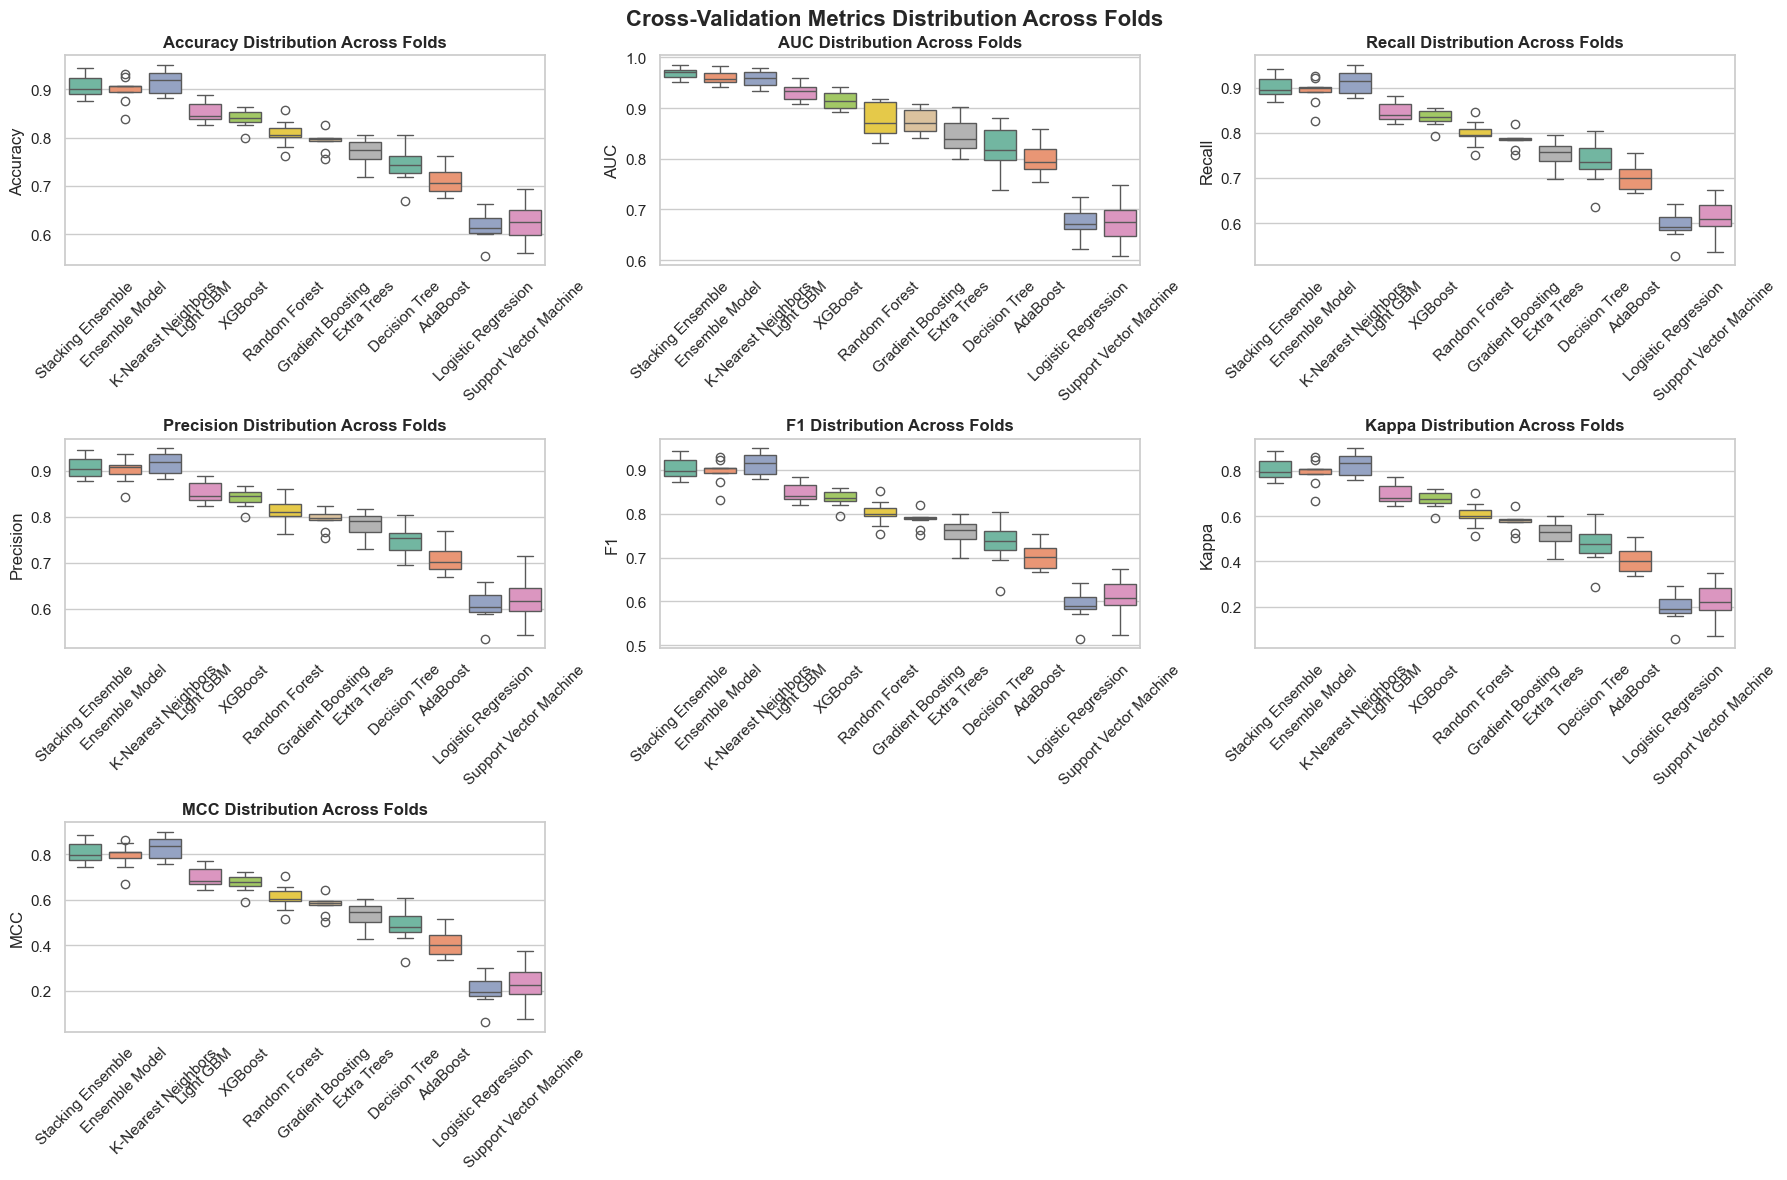


بخش 2) Test Set: مقایسه عملکرد نهایی مدل‌ها روی TEST
این نمودار متریک‌های نهایی را بعد از Train روی کل TRAIN و ارزیابی روی TEST نشان می‌دهد (از test_df_display).


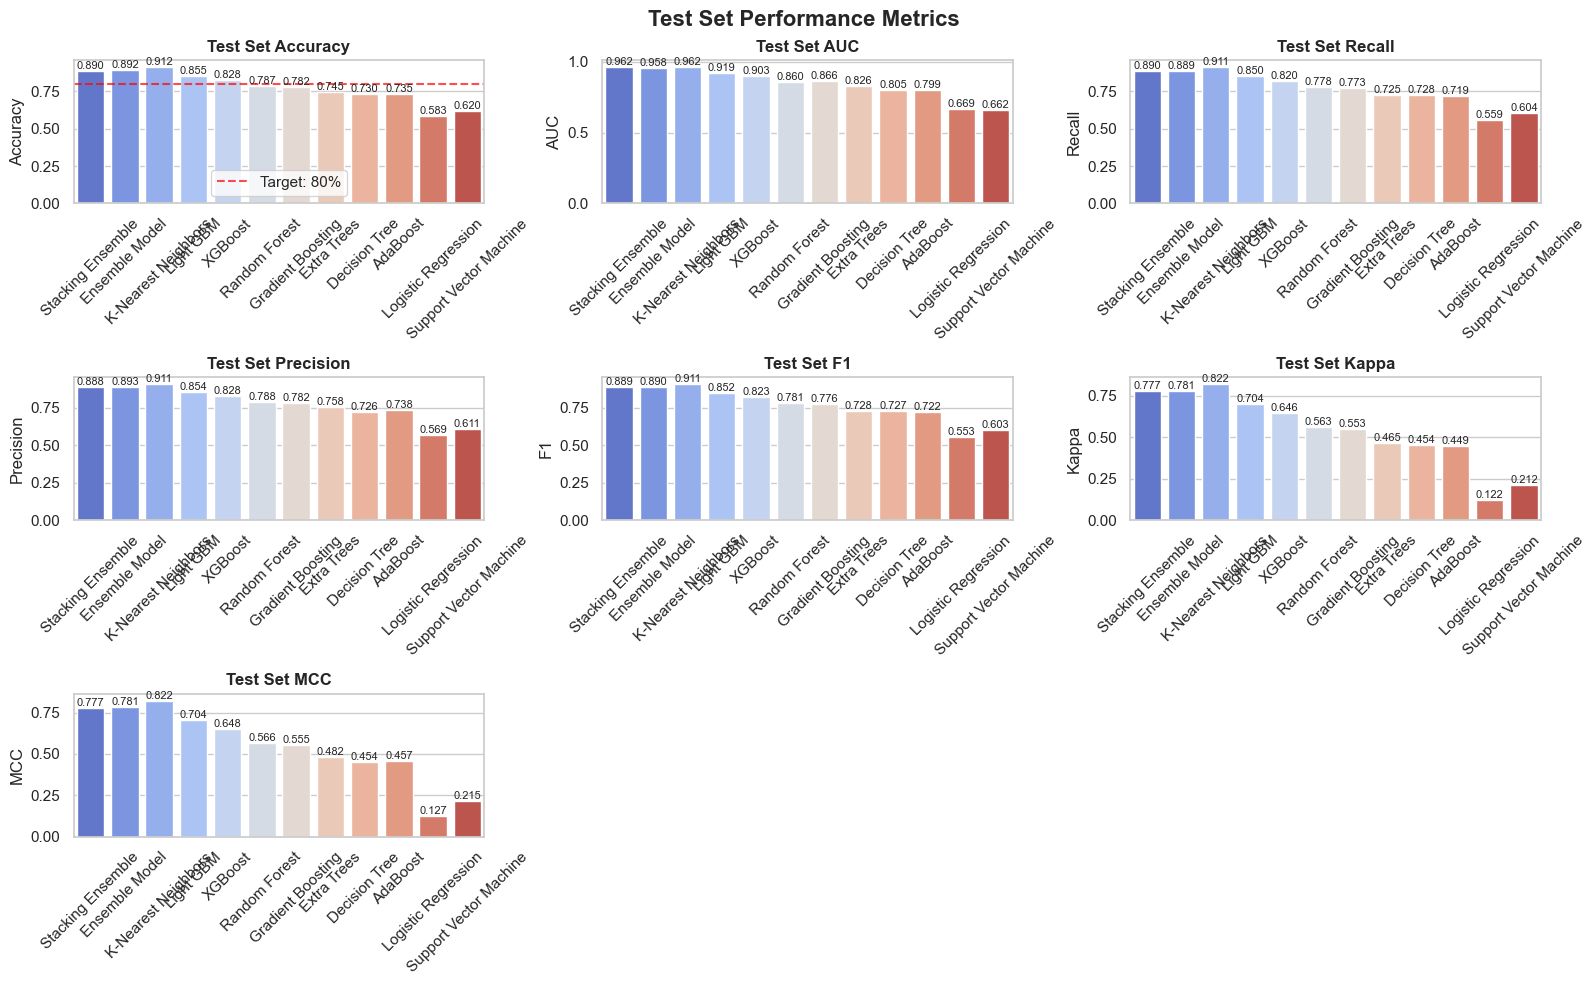


بخش 3) مقایسه مستقیم Cross-Validation و Test Set
این بخش برای متریک‌های کلیدی، اختلاف CV و TEST را کنار هم نشان می‌دهد.


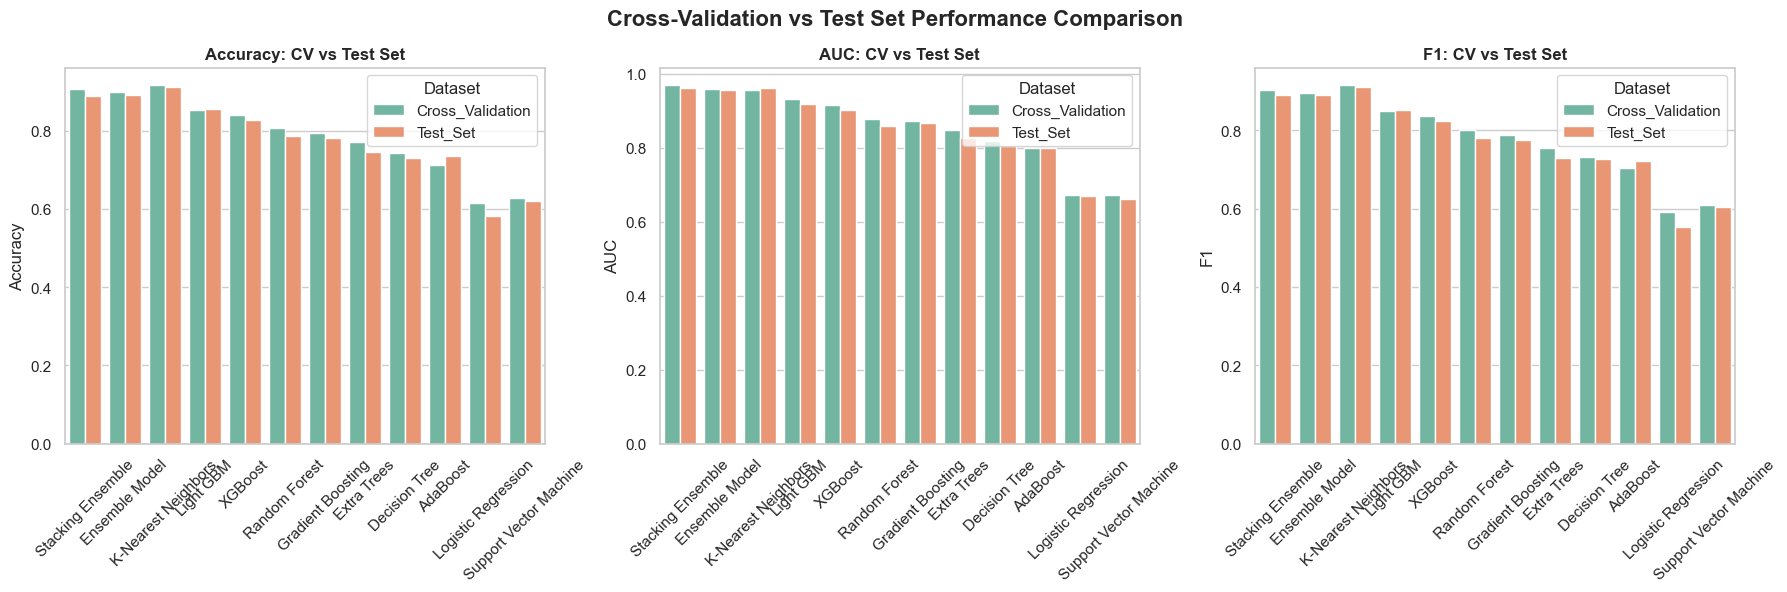


بخش 4) تحلیل زمان اجرا (Training/Prediction)
این نمودار میانگین زمان آموزش و زمان پیش‌بینی را (از timing_df) مقایسه می‌کند.


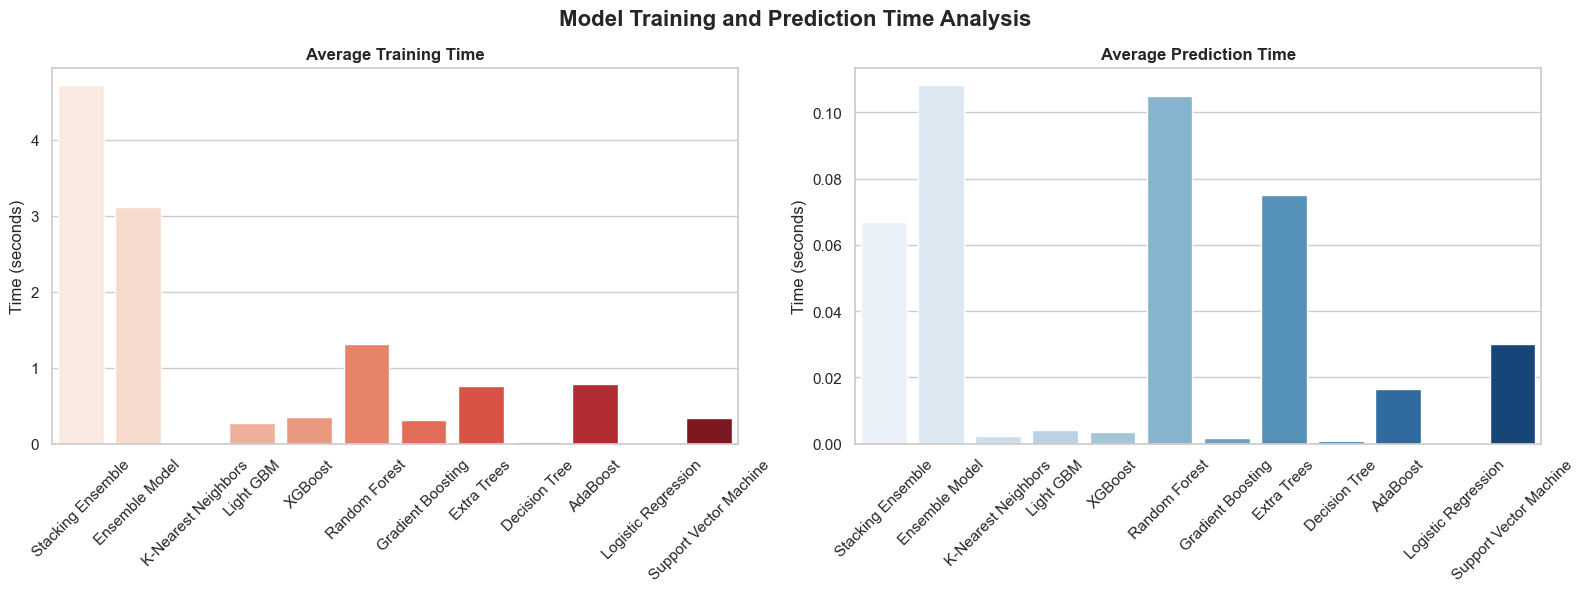


بخش 5) Radar Chart: مقایسه کلی 5 مدل برتر بر اساس Accuracy روی TEST
در این نمودار، متریک‌ها نرمال‌سازی می‌شوند تا همه در بازه 0 تا 1 قابل مقایسه باشند.


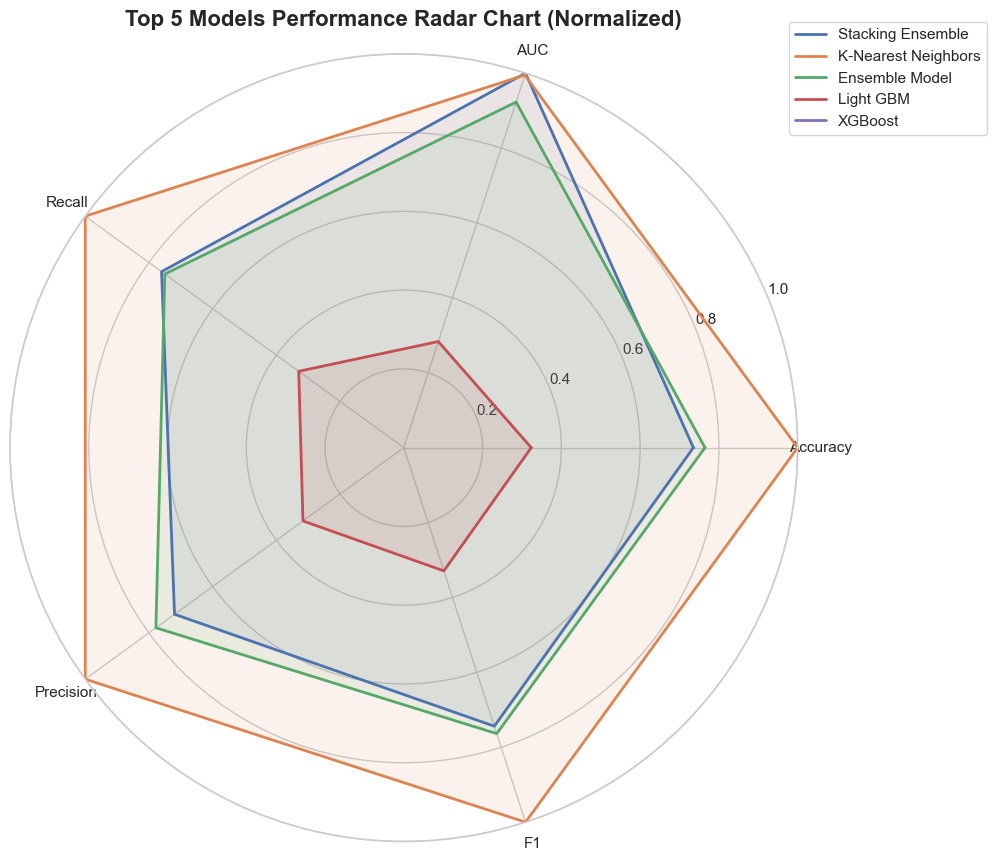


بخش 6) خلاصه نهایی عملکرد مدل‌ها روی TEST
این بخش بهترین مدل‌ها، مدل‌های بالای 80% Accuracy و Ensemble ها را گزارش می‌کند.

Top Performing Models on Test Set:
------------------------------------------------------------
K-Nearest Neighbors       | Acc: 0.912 | AUC: 0.962 | F1: 0.911
Ensemble Model            | Acc: 0.892 | AUC: 0.958 | F1: 0.890
Stacking Ensemble         | Acc: 0.890 | AUC: 0.962 | F1: 0.889
Light GBM                 | Acc: 0.855 | AUC: 0.919 | F1: 0.852
XGBoost                   | Acc: 0.828 | AUC: 0.903 | F1: 0.823

Models achieving target accuracy (≥ 80%):
------------------------------------------------------------
✓ K-Nearest Neighbors       | Acc: 0.912
✓ Ensemble Model            | Acc: 0.892
✓ Stacking Ensemble         | Acc: 0.890
✓ Light GBM                 | Acc: 0.855
✓ XGBoost                   | Acc: 0.828

Best Ensemble Models:
------------------------------------------------------------
Ensemble Model            | Acc: 0.892 | AUC: 0.958
Stacking Ensem

In [81]:
# =============================================================================
# Clean + No-Warning Plotting Script (FIXED for your current outputs)
#
# This script is compatible with the evaluation code we finalized:
#   - cv_summary_sorted  (from CV summary)
#   - cv_df              (per-fold results from CV)
#   - test_df_sorted     (test results)
#   - timing_df_sorted   (timing results)
#
# It also fixes:
#   ✅ fold-metrics column names (your cv_df uses Precision not "Prec.")
#   ✅ robust seaborn compatibility across versions (errorbar vs ci)
#   ✅ palette usage without crashing
#   ✅ consistent model order across CV/Test/Timing
# =============================================================================

# ---- 0) Silence warnings ----
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

# ---- 1) Global plot settings ----
sns.set_theme(style="whitegrid")
plt.rcParams.update({"figure.figsize": (12, 8), "font.size": 10})
plt.rcParams["figure.constrained_layout.use"] = False


# =============================================================================
# Helpers (robust across seaborn versions)
# =============================================================================
def _title_block(title, subtitle=None):
    print("\n" + "=" * 90)
    print(title)
    if subtitle:
        print(subtitle)
    print("=" * 90)


def _safe_bar_label(ax, fmt="%.3f", fontsize=8):
    if hasattr(ax, "bar_label"):
        for c in ax.containers:
            ax.bar_label(c, fmt=fmt, fontsize=fontsize)


def _barplot(ax, data, x, y, palette=None, hue=None, order=None, hue_order=None):
    """
    Seaborn barplot wrapper to support both:
      - seaborn>=0.12 : errorbar=None
      - seaborn<0.12  : ci=None
    """
    try:
        sns.barplot(data=data, x=x, y=y, hue=hue, ax=ax, palette=palette,
                    errorbar=None, order=order, hue_order=hue_order)
    except TypeError:
        sns.barplot(data=data, x=x, y=y, hue=hue, ax=ax, palette=palette,
                    ci=None, order=order, hue_order=hue_order)


def _boxplot(ax, data, x, y, palette=None, order=None):
    sns.boxplot(data=data, x=x, y=y, ax=ax, palette=palette, order=order)


# =============================================================================
# 0) Map your actual variable names (NO NEED to rename upstream)
# =============================================================================
# If you used different names, set them here.
cv_summary = cv_summary_sorted.copy() if "cv_summary_sorted" in globals() else cv_summary.copy()
all_cv_performances = cv_df.copy() if "cv_df" in globals() else all_cv_performances.copy()
test_df_display = test_df_sorted.copy() if "test_df_sorted" in globals() else test_df_display.copy()
timing_df = timing_df_sorted.copy() if "timing_df_sorted" in globals() else timing_df.copy()

# Ensure required columns exist (best-effort)
assert "Model" in cv_summary.columns, "cv_summary must contain 'Model'"
assert "Model" in all_cv_performances.columns, "all_cv_performances must contain 'Model'"
assert "Model" in test_df_display.columns, "test_df_display must contain 'Model'"
assert "Model" in timing_df.columns, "timing_df must contain 'Model'"

# Prefer consistent model ordering (CV order)
model_order = cv_summary["Model"].tolist()


# =============================================================================
# بخش 1) Cross-Validation: نمودار ستونی میانگین متریک‌ها
# =============================================================================
_title_block(
    "بخش 1) Cross-Validation: مقایسه میانگین متریک‌ها (روی TRAIN با K-Fold)",
    "این نمودار میانگین متریک‌های CV را برای هر مدل نشان می‌دهد (از cv_summary)."
)

cv_metrics = ["Accuracy_Mean", "AUC_Mean", "Recall_Mean", "Precision_Mean", "F1_Mean", "Kappa_Mean", "MCC_Mean"]
cv_metrics = [m for m in cv_metrics if m in cv_summary.columns]  # robust

n = len(cv_metrics)
n_cols = 3
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.ravel()

for i, metric in enumerate(cv_metrics):
    ax = axes[i]
    _barplot(ax, data=cv_summary, x="Model", y=metric, palette="viridis", order=model_order)
    ax.set_title(f"Cross-Validation {metric.replace('_', ' ')}", fontsize=12, fontweight="bold")
    ax.tick_params(axis="x", rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel(metric.replace("_Mean", ""))
    _safe_bar_label(ax, fmt="%.3f", fontsize=8)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Cross-Validation Performance Metrics Comparison", fontsize=16, fontweight="bold")
fig.tight_layout()
plt.show()


# =============================================================================
# بخش 1-ب) Cross-Validation: نمودار جعبه‌ای توزیع متریک‌ها در فولدها
# =============================================================================
_title_block(
    "بخش 1-ب) Cross-Validation: توزیع متریک‌ها بین فولدها",
    "این نمودار پراکندگی/توزیع متریک‌ها را در فولدهای مختلف نشان می‌دهد (از all_cv_performances)."
)

# ✅ FIX: your per-fold df uses column "Precision" not "Prec."
fold_metrics = ["Accuracy", "AUC", "Recall", "Precision", "F1", "Kappa", "MCC"]
fold_metrics = [m for m in fold_metrics if m in all_cv_performances.columns]

n = len(fold_metrics)
n_cols = 3
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.ravel()

for i, metric in enumerate(fold_metrics):
    ax = axes[i]
    _boxplot(ax, data=all_cv_performances, x="Model", y=metric, palette="Set2", order=model_order)
    ax.set_title(f"{metric} Distribution Across Folds", fontsize=12, fontweight="bold")
    ax.tick_params(axis="x", rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel(metric)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Cross-Validation Metrics Distribution Across Folds", fontsize=16, fontweight="bold")
fig.tight_layout()
plt.show()


# =============================================================================
# بخش 2) Test Set: نمودار ستونی متریک‌ها
# =============================================================================
_title_block(
    "بخش 2) Test Set: مقایسه عملکرد نهایی مدل‌ها روی TEST",
    "این نمودار متریک‌های نهایی را بعد از Train روی کل TRAIN و ارزیابی روی TEST نشان می‌دهد (از test_df_display)."
)

test_metrics = ["Accuracy", "AUC", "Recall", "Precision", "F1", "Kappa", "MCC"]
test_metrics = [m for m in test_metrics if m in test_df_display.columns]

n = len(test_metrics)
n_cols = 3
n_rows = int(np.ceil(n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10))
axes = axes.ravel()

# keep same model order; if some models missing in test_df_display, filter
test_model_order = [m for m in model_order if m in set(test_df_display["Model"])]

for i, metric in enumerate(test_metrics):
    ax = axes[i]
    _barplot(ax, data=test_df_display, x="Model", y=metric, palette="coolwarm", order=test_model_order)
    ax.set_title(f"Test Set {metric}", fontsize=12, fontweight="bold")
    ax.tick_params(axis="x", rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel(metric)

    _safe_bar_label(ax, fmt="%.3f", fontsize=8)

    if metric == "Accuracy":
        ax.axhline(y=0.8, color="red", linestyle="--", alpha=0.7, label="Target: 80%")
        ax.legend()

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Test Set Performance Metrics", fontsize=16, fontweight="bold")
fig.tight_layout()
plt.show()


# =============================================================================
# بخش 3) CV vs Test: مقایسه مستقیم
# =============================================================================
_title_block(
    "بخش 3) مقایسه مستقیم Cross-Validation و Test Set",
    "این بخش برای متریک‌های کلیدی، اختلاف CV و TEST را کنار هم نشان می‌دهد."
)

comparison_metrics = ["Accuracy", "AUC", "F1"]
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, metric in enumerate(comparison_metrics):
    # cv_summary columns are like Accuracy_Mean, AUC_Mean, F1_Mean
    cv_col = f"{metric}_Mean"
    if cv_col not in cv_summary.columns or metric not in test_df_display.columns:
        axes[i].axis("off")
        continue

    # Align test by model
    test_map = test_df_display.set_index("Model")[metric]
    aligned_test = [test_map.get(m, np.nan) for m in cv_summary["Model"]]

    comparison_data = pd.DataFrame({
        "Model": cv_summary["Model"],
        "Cross_Validation": cv_summary[cv_col].values,
        "Test_Set": np.array(aligned_test, dtype=float)
    })

    comparison_melted = comparison_data.melt(
        id_vars=["Model"],
        value_vars=["Cross_Validation", "Test_Set"],
        var_name="Dataset",
        value_name=metric
    )

    _barplot(
        axes[i],
        data=comparison_melted,
        x="Model", y=metric, hue="Dataset",
        palette="Set2",
        order=model_order,
        hue_order=["Cross_Validation", "Test_Set"]
    )
    axes[i].set_title(f"{metric}: CV vs Test Set", fontsize=12, fontweight="bold")
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].set_xlabel("")
    axes[i].legend(title="Dataset")

fig.suptitle("Cross-Validation vs Test Set Performance Comparison", fontsize=16, fontweight="bold")
fig.tight_layout()
plt.show()


# =============================================================================
# بخش 4) Timing: زمان آموزش و پیش‌بینی
# =============================================================================
_title_block(
    "بخش 4) تحلیل زمان اجرا (Training/Prediction)",
    "این نمودار میانگین زمان آموزش و زمان پیش‌بینی را (از timing_df) مقایسه می‌کند."
)

# Align timing order to model_order
timing_model_order = [m for m in model_order if m in set(timing_df["Model"])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

_barplot(ax1, data=timing_df, x="Model", y="Avg_Training_Time", palette="Reds", order=timing_model_order)
ax1.set_title("Average Training Time", fontsize=12, fontweight="bold")
ax1.tick_params(axis="x", rotation=45)
ax1.set_xlabel("")
ax1.set_ylabel("Time (seconds)")

_barplot(ax2, data=timing_df, x="Model", y="Avg_Prediction_Time", palette="Blues", order=timing_model_order)
ax2.set_title("Average Prediction Time", fontsize=12, fontweight="bold")
ax2.tick_params(axis="x", rotation=45)
ax2.set_xlabel("")
ax2.set_ylabel("Time (seconds)")

fig.suptitle("Model Training and Prediction Time Analysis", fontsize=16, fontweight="bold")
fig.tight_layout()
plt.show()


# =============================================================================
# بخش 5) Radar: مقایسه کلی Top-5
# =============================================================================
_title_block(
    "بخش 5) Radar Chart: مقایسه کلی 5 مدل برتر بر اساس Accuracy روی TEST",
    "در این نمودار، متریک‌ها نرمال‌سازی می‌شوند تا همه در بازه 0 تا 1 قابل مقایسه باشند."
)

# pick top 5 models by Accuracy (drop NaNs if any)
top_models = (
    test_df_display.dropna(subset=["Accuracy"])
                  .sort_values("Accuracy", ascending=False)
                  .head(5)["Model"].tolist()
)

radar_metrics = ["Accuracy", "AUC", "Recall", "Precision", "F1"]
radar_metrics = [m for m in radar_metrics if m in test_df_display.columns]

radar_data = test_df_display[test_df_display["Model"].isin(top_models)][["Model"] + radar_metrics].copy()

# Normalize safely per-metric
for metric in radar_metrics:
    mn, mx = radar_data[metric].min(), radar_data[metric].max()
    denom = (mx - mn) if (mx - mn) != 0 else 1.0
    radar_data[metric] = (radar_data[metric] - mn) / denom

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="polar"))

N = len(radar_metrics)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for _, row in radar_data.iterrows():
    values = row[radar_metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle="solid", label=row["Model"])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_metrics)
ax.set_ylim(0, 1)
ax.set_title("Top 5 Models Performance Radar Chart (Normalized)", size=16, fontweight="bold", pad=20)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05))
ax.grid(True)

plt.tight_layout()
plt.show()


# =============================================================================
# بخش 6) Summary: چاپ خلاصه نهایی
# =============================================================================
_title_block(
    "بخش 6) خلاصه نهایی عملکرد مدل‌ها روی TEST",
    "این بخش بهترین مدل‌ها، مدل‌های بالای 80% Accuracy و Ensemble ها را گزارش می‌کند."
)

test_summary = test_df_display.sort_values("Accuracy", ascending=False)

print("\nTop Performing Models on Test Set:")
print("-" * 60)
for _, row in test_summary.head(5).iterrows():
    print(f"{row['Model']:<25} | Acc: {row['Accuracy']:.3f} | AUC: {row.get('AUC', np.nan):.3f} | F1: {row['F1']:.3f}")

print("\nModels achieving target accuracy (≥ 80%):")
print("-" * 60)
high_performers = test_summary[test_summary["Accuracy"] >= 0.8]
if len(high_performers) > 0:
    for _, row in high_performers.iterrows():
        print(f"✓ {row['Model']:<25} | Acc: {row['Accuracy']:.3f}")
else:
    print("No models achieved the target accuracy of 80%")

print("\nBest Ensemble Models:")
print("-" * 60)
ensemble_models = test_summary[test_summary["Model"].str.contains("Ensemble", case=False, na=False)]
if len(ensemble_models) > 0:
    for _, row in ensemble_models.iterrows():
        print(f"{row['Model']:<25} | Acc: {row['Accuracy']:.3f} | AUC: {row.get('AUC', np.nan):.3f}")
else:
    print("No ensemble models found in the results.")



شکل 1) ROC Curve Comparison روی TEST
همه مدل‌ها روی TRAIN fit می‌شوند و سپس منحنی ROC روی TEST رسم می‌شود. برچسب هر مدل شامل AUC همان مدل است.


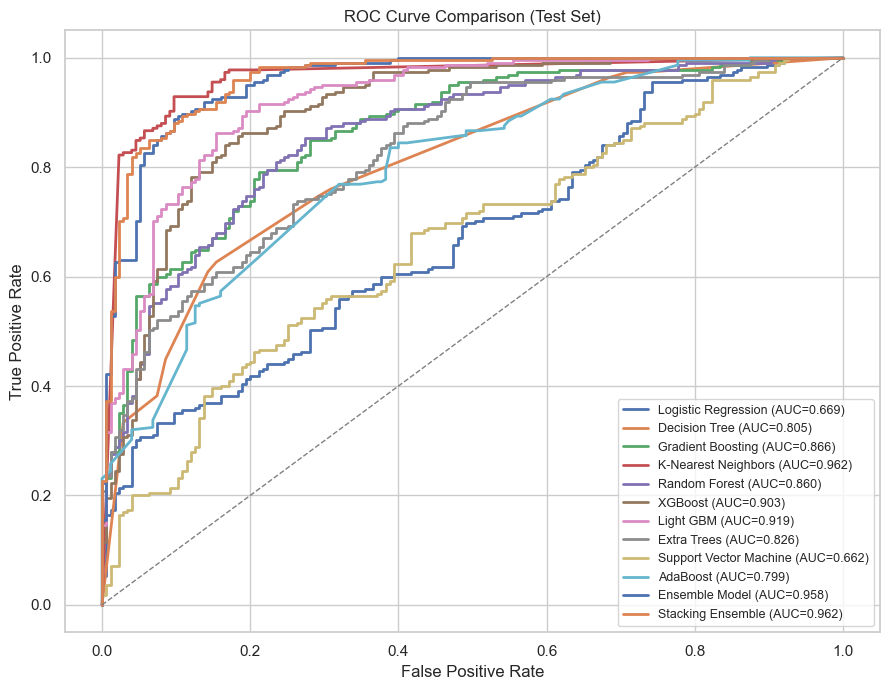


شکل 2) Precision-Recall Curve Comparison روی TEST
همه مدل‌ها روی TRAIN fit می‌شوند و سپس منحنی Precision-Recall روی TEST رسم می‌شود. برچسب هر مدل شامل Average Precision (AP) همان مدل است.


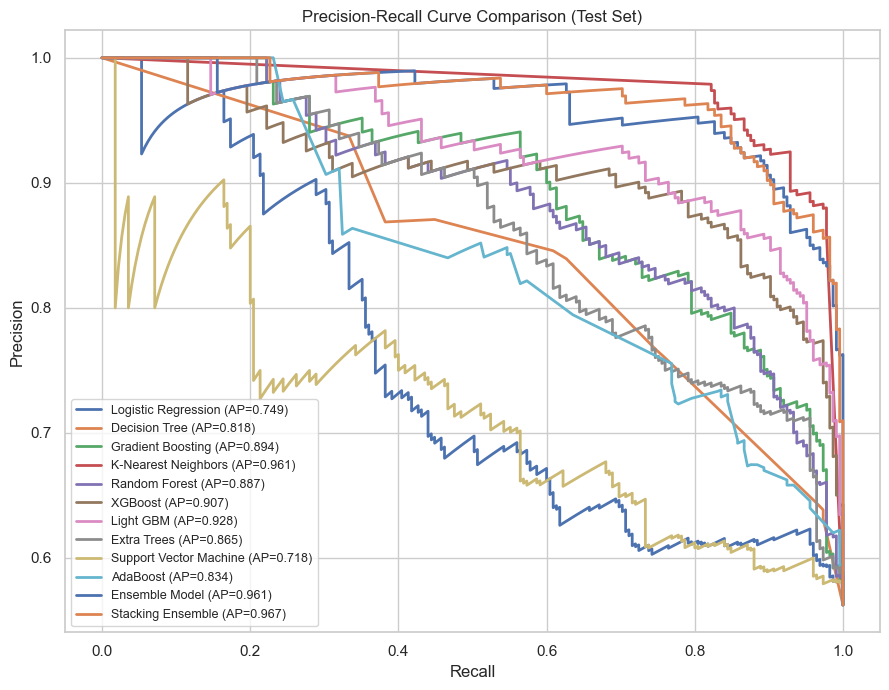


فایل‌های خروجی ذخیره شدند:
- ROC_Curve_Comparison.png
- PR_Curve_Comparison.png


In [82]:
# =============================================================================
# ROC + PR Curves (FIXED for your pipeline: DataFrame X_train/X_test, Series y)
#
# Requirements:
#   models, X_train, y_train, X_test, y_test
# Outputs:
#   ROC_Curve_Comparison.png
#   PR_Curve_Comparison.png
#
# Fixes:
#   ✅ uses the same safe scoring logic as your evaluation (_safe_predict_scores-like)
#   ✅ forces y to 1D int (avoids shape issues)
#   ✅ robustly skips models that can't produce scores
#   ✅ avoids crashing on single-class edge cases
# =============================================================================

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score


def _title_block(title, subtitle=None):
    print("\n" + "=" * 90)
    print(title)
    if subtitle:
        print(subtitle)
    print("=" * 90)


def get_model_scores(model, X):
    """
    Continuous scores for ROC/PR:
      1) predict_proba[:, 1]
      2) decision_function
      3) None (skip)
    """
    if hasattr(model, "predict_proba"):
        try:
            proba = model.predict_proba(X)
            if proba is not None and proba.ndim == 2 and proba.shape[1] >= 2:
                return proba[:, 1]
        except Exception:
            pass

    if hasattr(model, "decision_function"):
        try:
            return model.decision_function(X)
        except Exception:
            pass

    return None


# Ensure y is 1D numeric (robust)
y_train_plot = np.asarray(y_train).astype(int).ravel()
y_test_plot  = np.asarray(y_test).astype(int).ravel()


# =============================================================================
# 1) ROC Curve Comparison
# =============================================================================
_title_block(
    "شکل 1) ROC Curve Comparison روی TEST",
    "همه مدل‌ها روی TRAIN fit می‌شوند و سپس منحنی ROC روی TEST رسم می‌شود. "
    "برچسب هر مدل شامل AUC همان مدل است."
)

plt.figure(figsize=(9, 7))

plotted_any = False
for model_name, model in models.items():
    try:
        model.fit(X_train, y_train_plot)
        y_score = get_model_scores(model, X_test)
        if y_score is None:
            continue

        # Edge case: if y_test has only one class, ROC is undefined
        if len(np.unique(y_test_plot)) < 2:
            continue

        fpr, tpr, _ = roc_curve(y_test_plot, y_score)

        # Safer AUC calculation
        try:
            roc_auc = roc_auc_score(y_test_plot, y_score)
        except Exception:
            roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC={roc_auc:.3f})")
        plotted_any = True
    except Exception:
        continue

# random baseline
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", lw=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Test Set)")
plt.grid(True)
if plotted_any:
    plt.legend(fontsize=9)
plt.tight_layout()
plt.savefig("ROC_Curve_Comparison.png", dpi=300)
plt.show()


# =============================================================================
# 2) Precision-Recall Curve Comparison
# =============================================================================
_title_block(
    "شکل 2) Precision-Recall Curve Comparison روی TEST",
    "همه مدل‌ها روی TRAIN fit می‌شوند و سپس منحنی Precision-Recall روی TEST رسم می‌شود. "
    "برچسب هر مدل شامل Average Precision (AP) همان مدل است."
)

plt.figure(figsize=(9, 7))

plotted_any = False
for model_name, model in models.items():
    try:
        model.fit(X_train, y_train_plot)
        y_score = get_model_scores(model, X_test)
        if y_score is None:
            continue

        # Edge case: if y_test has only one class, PR still works but AP may be tricky
        precision, recall, _ = precision_recall_curve(y_test_plot, y_score)

        try:
            ap = average_precision_score(y_test_plot, y_score)
        except Exception:
            ap = np.nan

        plt.plot(recall, precision, lw=2, label=f"{model_name} (AP={ap:.3f})")
        plotted_any = True
    except Exception:
        continue

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison (Test Set)")
plt.grid(True)
if plotted_any:
    plt.legend(fontsize=9)
plt.tight_layout()
plt.savefig("PR_Curve_Comparison.png", dpi=300)
plt.show()

print("\nفایل‌های خروجی ذخیره شدند:")
print("- ROC_Curve_Comparison.png")
print("- PR_Curve_Comparison.png")
